# **Loading Dataset**


https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring

* subjectNo:  Integer that uniquely identifies each subject
* age:  Subject age
* sex:  Subject gender '0':  male, '1':  female
* test_time:  Time since recruitment into the trial. The integer part is the number of days since recruitment.
* motor_UPDRS:  Clinician's motor UPDRS score, linearly interpolated
* total_UPDRS:  Clinician's total UPDRS score, linearly interpolated
* Jitter(%), Jitter(Abs), Jitter:RAP, Jitter:PPQ5, Jitter:DDP:  Several measures of variation in fundamental frequency
* Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA:  Several measures of variation in amplitude
* NHR,HNR:  Two measures of ratio of noise to tonal components in the voice
* RPDE:  A nonlinear dynamical complexity measure
* DFA:  Signal fractal scaling exponent
* PPE:  A nonlinear measure of fundamental frequency variation

In [1]:
import pandas as pd
# Non limit columns, rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQK-E_pgY4hVGklSqUz0cEfixmtpotqd8-AoAW9wUE-8WvSexXFrGerQ6cV0Hj_Bqg38LZmyhA1GfCy/pub?output=csv"
parkinson_data = pd.read_csv(url)
parkinson_data.head(10)

,subjectNo,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,662.0,0.000034,401.0,317.0,1.204,2.565,0.23,1.438,1.309,1.662,4.314,1.429,21.640,41.888,54.842,16.006
1,1,72,0,12.6660,28.447,34.894,3.0,0.000017,132.0,15.0,395.000,2.024,179.00,994.000,1.072,1.689,2.982,11.112,27.183,43.493,56.477,1.081
2,1,72,0,19.6810,28.695,35.389,481.0,0.024600,205.0,208.0,616.000,1.675,181.00,734.000,844.000,1.458,2.202,2.022,23.047,46.222,54.405,21.014
3,1,72,0,25.6470,28.905,35.810,528.0,0.026600,191.0,264.0,573.000,2.309,327.00,1.106,1.265,1.963,3.317,27.837,24.445,4.873,57.794,33.277
4,1,72,0,33.6420,29.187,36.375,335.0,0.020100,93.0,13.0,278.000,1.703,176.00,679.000,929.000,1.819,2.036,11.625,26.126,47.188,56.122,19.361
5,1,72,0,40.6520,29.435,36.870,353.0,0.000023,119.0,159.0,357.000,2.227,214.00,1.006,1.337,2.263,3.019,9.438,22.946,53.949,57.243,195.000
6,1,72,0,47.6490,29.682,37.363,422.0,0.024000,212.0,221.0,637.000,4.352,445.00,2.376,2.621,3.488,7.128,1.326,22.506,4.925,54.779,17.563
7,1,72,0,54.6400,29.928,37.857,476.0,0.024700,226.0,259.0,678.000,2.191,212.00,979.000,1.462,1.911,2.937,27.969,22.929,47.712,54.234,23.844
8,1,72,0,61.6690,30.177,38.353,432.0,0.028500,156.0,207.0,468.000,4.296,371.00,1.774,2.134,3.451,5.323,13.381,22.078,51.563,61.864,20.037
9,1,72,0,68.6880,30.424,38.849,496.0,0.027000,258.0,253.0,773.000,361.000,0.31,203.000,197.000,2.569,6.089,18.021,22.606,50.032,58.673,20.117


In [3]:
# The subjectNo identifies each subject, and is a cualitative attribute, furthermore, in the context of what I'd like to predict
# is not a meaninful attribute
parkinson_data.drop(['subjectNo'], inplace=True, axis=1)
parkinson_data.head(10)

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,34.398,662.0,0.000034,401.0,317.0,1.204,2.565,0.23,1.438,1.309,1.662,4.314,1.429,21.640,41.888,54.842,16.006
1,72,0,12.6660,28.447,34.894,3.0,0.000017,132.0,15.0,395.000,2.024,179.00,994.000,1.072,1.689,2.982,11.112,27.183,43.493,56.477,1.081
2,72,0,19.6810,28.695,35.389,481.0,0.024600,205.0,208.0,616.000,1.675,181.00,734.000,844.000,1.458,2.202,2.022,23.047,46.222,54.405,21.014
3,72,0,25.6470,28.905,35.810,528.0,0.026600,191.0,264.0,573.000,2.309,327.00,1.106,1.265,1.963,3.317,27.837,24.445,4.873,57.794,33.277
4,72,0,33.6420,29.187,36.375,335.0,0.020100,93.0,13.0,278.000,1.703,176.00,679.000,929.000,1.819,2.036,11.625,26.126,47.188,56.122,19.361
5,72,0,40.6520,29.435,36.870,353.0,0.000023,119.0,159.0,357.000,2.227,214.00,1.006,1.337,2.263,3.019,9.438,22.946,53.949,57.243,195.000
6,72,0,47.6490,29.682,37.363,422.0,0.024000,212.0,221.0,637.000,4.352,445.00,2.376,2.621,3.488,7.128,1.326,22.506,4.925,54.779,17.563
7,72,0,54.6400,29.928,37.857,476.0,0.024700,226.0,259.0,678.000,2.191,212.00,979.000,1.462,1.911,2.937,27.969,22.929,47.712,54.234,23.844
8,72,0,61.6690,30.177,38.353,432.0,0.028500,156.0,207.0,468.000,4.296,371.00,1.774,2.134,3.451,5.323,13.381,22.078,51.563,61.864,20.037
9,72,0,68.6880,30.424,38.849,496.0,0.027000,258.0,253.0,773.000,361.000,0.31,203.000,197.000,2.569,6.089,18.021,22.606,50.032,58.673,20.117


# **Basic statistics**

In [4]:
print(parkinson_data.describe().transpose())

                count        mean         std        min       25%       50%  \
age            5875.0   64.804936    8.821524  36.000000   58.0000   65.0000   
sex            5875.0    0.317787    0.465656   0.000000    0.0000    0.0000   
test_time      5875.0   92.884873   53.475371 -42.625000   46.8580   91.5230   
motor_UPDRS    5875.0   21.296229    8.129282   5.037700   15.0000   20.8710   
total_UPDRS    5875.0   29.018942   10.700283   7.000000   21.3710   27.5760   
Jitter(%)      5875.0  407.089149  247.143888   0.010000  255.0000  411.0000   
Jitter(Abs)    5875.0    0.942626    4.676142   0.000002    0.0191    0.0321   
Jitter:RAP     5875.0  231.716673  162.963715   1.000000  131.0000  202.0000   
Jitter:PPQ5    5875.0  247.970368  161.193225   1.000000  151.0000  224.0000   
Jitter:DDP     5875.0  408.306103  311.651036   0.010000   46.0000  437.0000   
Shimmer        5875.0   46.883439  151.065378   0.010000    2.0680    3.0460   
Shimmer(dB)    5875.0  249.826131  169.9

# **Dataset Validation**

In [5]:
#Null values validation
cols = parkinson_data.isnull().sum().index
values = parkinson_data.isnull().sum().values
null_values = pd.DataFrame({'cols':cols,'null_value':values})

null_values = null_values[null_values.null_value>0]
null_values

,cols,null_value


# **First data visualization**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

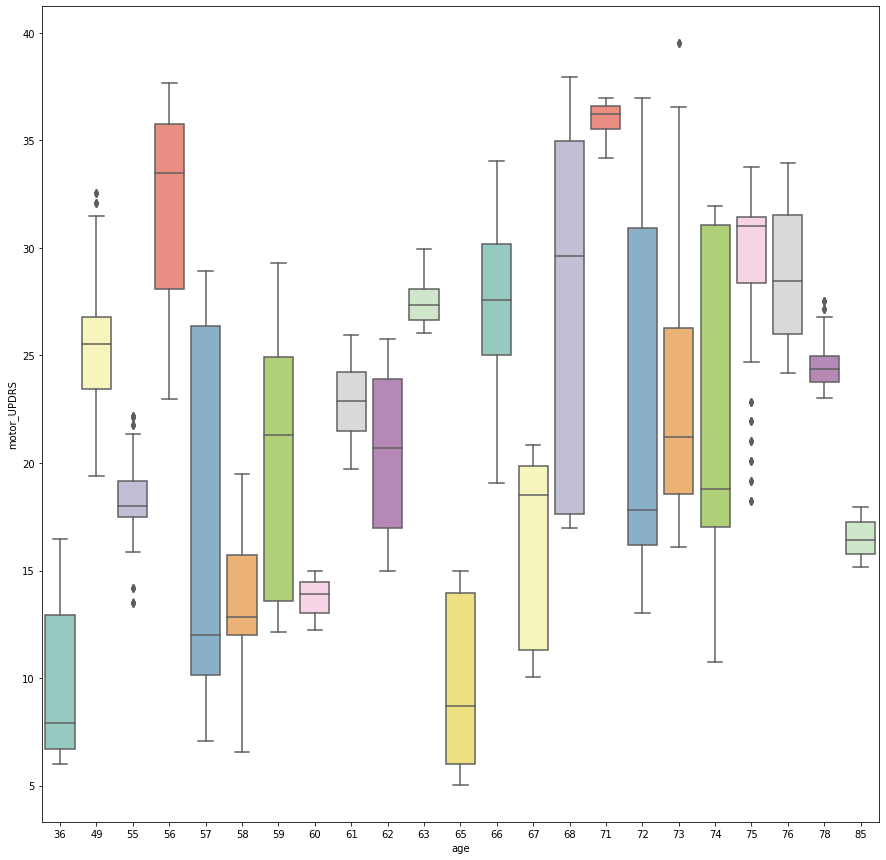

In [7]:
#Boxplot of motor_UPDRS per age to see easily outliers
from matplotlib import pyplot
a4_dims = (15, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.boxplot(x="age", y="motor_UPDRS",
                 data=parkinson_data.sort_values(by=['age']), palette="Set3")

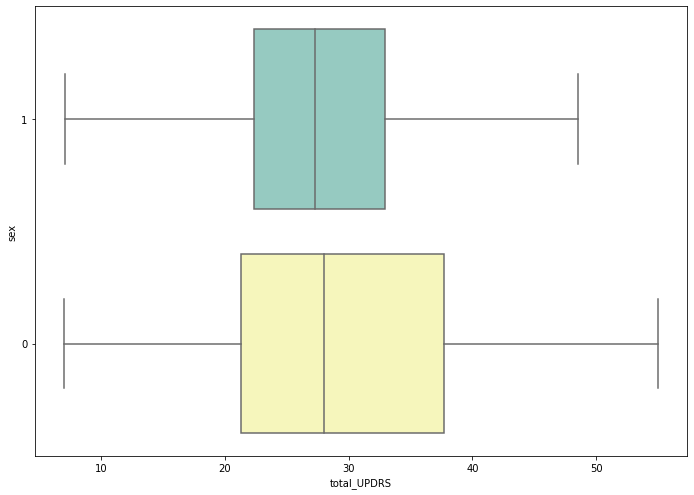

In [8]:
from matplotlib import pyplot
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

order = parkinson_data.groupby(["sex"])["total_UPDRS"].mean().sort_values().index

ax = sns.boxplot(x="total_UPDRS",
                 y="sex",
                 orient="h",
                 data=parkinson_data, palette="Set3",
                 order=order,
                )

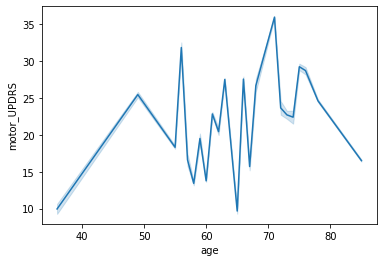

In [9]:
sns.lineplot(x='age', y='motor_UPDRS',
             data=parkinson_data,
             palette="Set2",
            )

# **Standardization of data**
There are data with a very different scale, therefore it is better to apply a standardization to leave all the data on the same scale


In [10]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

def normalize_z(df):
    """
    Function to normalize into z score
    Also to put first the columns that aren't numeric
    df:dataframe
    """
    result = df.copy()
    for feature_name in df.columns:

        if not is_numeric_dtype(df[feature_name]):
            result[feature_name] = result[feature_name]
        else:
            mean = df[feature_name].mean()
            sd = df[feature_name].std()
            result[feature_name] = ( df[feature_name] - mean ) / sd

    return result

In [11]:
# Convert series that are also cuantitative but that are meaninfull for the prediction into string datatype
parkinson_data['age']= parkinson_data['age'].astype(str)
parkinson_data['sex']= parkinson_data['sex'].astype(str)

In [12]:
pks_standardized = normalize_z(parkinson_data)
pks_standardized.head()

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,-1.631438,0.849124,0.502702,1.031427,-0.201575,1.038779,0.428242,-1.306275,-0.293373,-1.468666,-0.632509,-0.520498,-0.340709,-0.286197,-0.343788,-0.009204,-0.239142,-0.180682,-0.267251
1,72,0,-1.500109,0.879631,0.549056,-1.635036,-0.201578,-0.611895,-1.445286,-0.042696,-0.296954,-0.416753,2.335158,-0.521285,-0.340573,-0.295121,-0.250793,1.282541,-0.207229,-0.155695,-0.658805
2,72,0,-1.368927,0.910138,0.595317,0.299060,-0.196321,-0.163942,-0.247966,0.666431,-0.299264,-0.404985,1.557783,2.276170,-0.341737,-0.300346,-0.338093,0.318684,-0.152968,-0.187360,-0.135867
3,72,0,-1.257362,0.935971,0.634661,0.489233,-0.195894,-0.249851,0.099444,0.528456,-0.295067,0.454104,-0.633502,-0.520644,-0.339192,-0.292877,-0.090168,0.644475,-0.975123,-0.135567,0.185849
4,72,0,-1.107853,0.970660,0.687464,-0.291689,-0.197284,-0.851212,-1.457694,-0.418115,-0.299079,-0.434406,1.393338,2.558263,-0.339917,-0.301458,-0.245866,1.036217,-0.133760,-0.161120,-0.179233


# **Second Visualization Data**

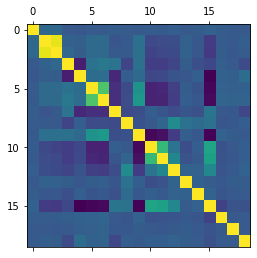

In [13]:
import matplotlib.pyplot as plt
corr_df = pks_standardized.corr(method='pearson')

plt.matshow(corr_df)
plt.show()

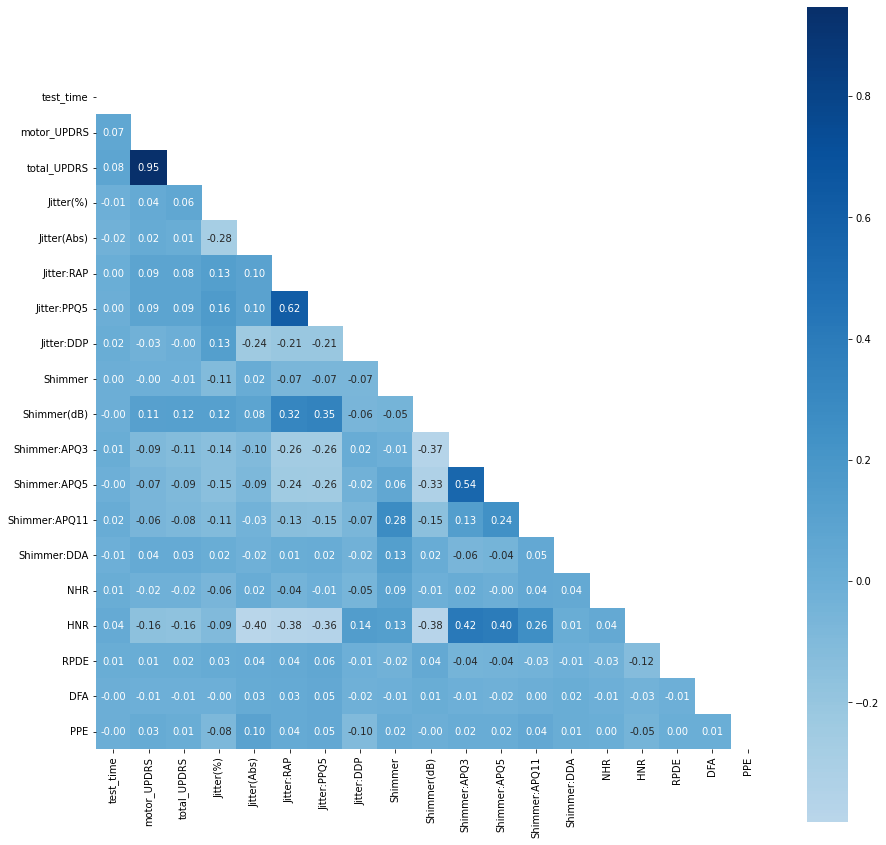

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix
matrix = pks_standardized.corr()
mask = np.triu(np.ones_like(matrix,dtype='bool'))

plt.figure(figsize=(15,15))
sns.heatmap(matrix,mask=mask, annot=True, center=0, fmt='.2f', square=True, cmap="Blues")
plt.show()

# **Feature Selection**

In [15]:
# Filtering attributes with correlation > 0.5 in absolute terms to reduce too correlated attributes in the dataset
# respect motor_UPDRS, that is our variable to predict

most_corr = abs(pks_standardized.corr()['motor_UPDRS'])[abs(pks_standardized.corr()['motor_UPDRS'])>0.5]

most_corr_df = pd.DataFrame({'Attribute':most_corr.index.tolist(),'Correlation':most_corr.values.tolist()})

most_corr_df

,Attribute,Correlation
0,motor_UPDRS,1.000000
1,total_UPDRS,0.947231


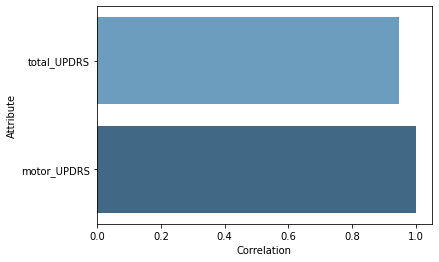

In [16]:
#Correlation by most correlated attributes
ax = sns.barplot(x="Correlation", y="Attribute", data=most_corr_df.sort_values(by=['Correlation'], ascending=True),
                 palette="Blues_d")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2490918810>]],
      dtype=object)

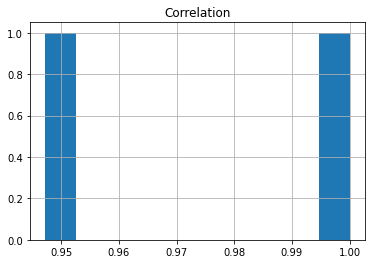

In [17]:
most_corr_df.hist()

In [18]:
# Remove from dataset the total_UPDRS due is too correlated to the prediction attribute motor_UPDRS
pks_standardized.drop(['total_UPDRS'], inplace=True, axis=1)
pks_standardized.head(10)

,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,-1.631438,0.849124,1.031427,-0.201575,1.038779,0.428242,-1.306275,-0.293373,-1.468666,-0.632509,-0.520498,-0.340709,-0.286197,-0.343788,-0.009204,-0.239142,-0.180682,-0.267251
1,72,0,-1.500109,0.879631,-1.635036,-0.201578,-0.611895,-1.445286,-0.042696,-0.296954,-0.416753,2.335158,-0.521285,-0.340573,-0.295121,-0.250793,1.282541,-0.207229,-0.155695,-0.658805
2,72,0,-1.368927,0.910138,0.299060,-0.196321,-0.163942,-0.247966,0.666431,-0.299264,-0.404985,1.557783,2.276170,-0.341737,-0.300346,-0.338093,0.318684,-0.152968,-0.187360,-0.135867
3,72,0,-1.257362,0.935971,0.489233,-0.195894,-0.249851,0.099444,0.528456,-0.295067,0.454104,-0.633502,-0.520644,-0.339192,-0.292877,-0.090168,0.644475,-0.975123,-0.135567,0.185849
4,72,0,-1.107853,0.970660,-0.291689,-0.197284,-0.851212,-1.457694,-0.418115,-0.299079,-0.434406,1.393338,2.558263,-0.339917,-0.301458,-0.245866,1.036217,-0.133760,-0.161120,-0.179233
5,72,0,-0.976765,1.001167,-0.218857,-0.201577,-0.691667,-0.551949,-0.164627,-0.295610,-0.210807,-0.633801,-0.520405,-0.337680,-0.294873,-0.266870,0.295147,0.000671,-0.143988,4.428611
6,72,0,-0.845920,1.031551,0.060333,-0.196450,-0.120988,-0.167317,0.733814,-0.281543,1.148436,-0.629705,-0.516144,-0.331506,-0.267346,-0.344777,0.192609,-0.974089,-0.181644,-0.226404
7,72,0,-0.715187,1.061812,0.278829,-0.196300,-0.035079,0.068425,0.865371,-0.295848,-0.222575,2.290310,-0.519991,-0.339454,-0.295422,-0.088900,0.291185,-0.123342,-0.189973,-0.061623
8,72,0,-0.583743,1.092442,0.100795,-0.195487,-0.464623,-0.254169,0.191541,-0.281914,0.713008,-0.631505,-0.517760,-0.331693,-0.279438,-0.229002,0.092868,-0.046771,-0.073367,-0.161499
9,72,0,-0.452486,1.122826,0.359753,-0.195808,0.161283,0.031203,1.170200,2.079342,-1.468196,-0.029858,0.128948,-0.336138,-0.274306,-0.184440,0.215913,-0.077212,-0.122134,-0.159400


In [19]:
# Describing dataset
# Top 10 variables with less standard deviation
pks_standardized.describe().T.sort_values(by=['std']).head(10)

,count,mean,std,min,25%,50%,75%,max
test_time,5875.0,1.148963e-16,1.0,-2.534061,-0.860712,-0.025467,0.851983,2.292740
RPDE,5875.0,-1.015925e-16,1.0,-1.062470,-0.195031,-0.017940,0.135489,13.343389
HNR,5875.0,-6.192304e-16,1.0,-4.665590,-0.529817,0.056047,0.644242,3.774211
NHR,5875.0,3.144530e-17,1.0,-0.347879,-0.267288,-0.192257,-0.069169,9.236801
Shimmer:DDA,5875.0,-3.386416e-17,1.0,-0.314763,-0.295593,-0.285588,-0.265882,6.370670
Shimmer:APQ11,5875.0,2.418869e-17,1.0,-0.349034,-0.340013,-0.335775,-0.326542,4.680493
Shimmer:APQ5,5875.0,0.000000e+00,1.0,-0.524809,-0.519695,-0.516858,-0.156463,2.790574
Shimmer:APQ3,5875.0,-9.675476e-18,1.0,-0.636779,-0.632255,-0.629092,0.669781,2.350108
Shimmer(dB),5875.0,-1.402944e-16,1.0,-1.469843,-0.616815,-0.134313,0.501178,4.384730
Shimmer,5875.0,2.418869e-17,1.0,-0.310286,-0.296663,-0.290189,-0.277555,6.296059


In [20]:
# Elimination of attributes that are not part of the top 10
pks_standardized.drop(['Jitter(%)'], inplace=True, axis=1)
pks_standardized.drop(['Jitter(Abs)'], inplace=True, axis=1)
pks_standardized.drop(['Jitter:RAP'], inplace=True, axis=1)
pks_standardized.drop(['Jitter:PPQ5'], inplace=True, axis=1)
pks_standardized.drop(['Jitter:DDP'], inplace=True, axis=1)
pks_standardized.drop(['DFA'], inplace=True, axis=1)
pks_standardized.drop(['PPE'], inplace=True, axis=1)
pks_standardized.head(10)

,age,sex,test_time,motor_UPDRS,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE
0,72,0,-1.631438,0.849124,-0.293373,-1.468666,-0.632509,-0.520498,-0.340709,-0.286197,-0.343788,-0.009204,-0.239142
1,72,0,-1.500109,0.879631,-0.296954,-0.416753,2.335158,-0.521285,-0.340573,-0.295121,-0.250793,1.282541,-0.207229
2,72,0,-1.368927,0.910138,-0.299264,-0.404985,1.557783,2.276170,-0.341737,-0.300346,-0.338093,0.318684,-0.152968
3,72,0,-1.257362,0.935971,-0.295067,0.454104,-0.633502,-0.520644,-0.339192,-0.292877,-0.090168,0.644475,-0.975123
4,72,0,-1.107853,0.970660,-0.299079,-0.434406,1.393338,2.558263,-0.339917,-0.301458,-0.245866,1.036217,-0.133760
5,72,0,-0.976765,1.001167,-0.295610,-0.210807,-0.633801,-0.520405,-0.337680,-0.294873,-0.266870,0.295147,0.000671
6,72,0,-0.845920,1.031551,-0.281543,1.148436,-0.629705,-0.516144,-0.331506,-0.267346,-0.344777,0.192609,-0.974089
7,72,0,-0.715187,1.061812,-0.295848,-0.222575,2.290310,-0.519991,-0.339454,-0.295422,-0.088900,0.291185,-0.123342
8,72,0,-0.583743,1.092442,-0.281914,0.713008,-0.631505,-0.517760,-0.331693,-0.279438,-0.229002,0.092868,-0.046771
9,72,0,-0.452486,1.122826,2.079342,-1.468196,-0.029858,0.128948,-0.336138,-0.274306,-0.184440,0.215913,-0.077212


# **Splitting Data**

In [21]:
columns = pks_standardized.columns
columns

Index(['age', 'sex', 'test_time', 'motor_UPDRS', 'Shimmer', 'Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR',
       'HNR', 'RPDE'],
      dtype='object')

In [22]:
from sklearn.model_selection import train_test_split

pks_standardized = pd.DataFrame(pks_standardized, columns=columns)

pks_train, pks_test = train_test_split(pks_standardized, test_size=0.10)

#X and Y
x_train = pks_train.drop(['motor_UPDRS'],axis=1)
y_train = pks_train['motor_UPDRS']

x_test = pks_test.drop(['motor_UPDRS'],axis=1)
y_test = pks_test['motor_UPDRS']

#Shapes
print("x_train shape: " + str(x_train.shape))
print("y_train shape: " + str(y_train.shape))
print("x_test shape: " + str(x_test.shape))
print("y_test shape: " + str(y_test.shape))

x_train shape: (5287, 12)
y_train shape: (5287,)
x_test shape: (588, 12)
y_test shape: (588,)


# **Regression Model**

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression

lineal_regression = LinearRegression().fit(x_train, y_train)

In [24]:
#Beta values

print("\nBeta:\n")
print(lineal_regression.coef_)

print("\nBeta0:\n")
print(lineal_regression.intercept_)

print("\nR^2:")
lineal_regression.score(x_test, y_test)


Beta:

[ 0.03055517 -0.03368925  0.07058651  0.02267931  0.03062012  0.01683245
  0.05885242 -0.01327838  0.03045026 -0.01253094 -0.15350901 -0.00920923]

Beta0:

-1.9683182762832294

R^2:


0.06911050198348223

# **Predict a new instance**

In [25]:
x_aleatory_instances_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTz3zNtWLmnrlK8PQpWAxvRZ8ha2QMLXIHmpyU_MsZJsZRbY2QiUlEMpYnXqRWKGrYKR2r4M9hsypZ9/pub?output=csv"
x_aleatory_instances = pd.read_csv(x_aleatory_instances_url)
x_aleatory_instances.head()

,age,sex,test_time,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE
0,35,1,11.85,2.191,176.0,1.106,1.265,1.911,2.937,27.837,26.126,51.563
1,50,0,16.85,5.191,568.0,6.106,5.265,18.911,25.937,1.837,2.126,25.563
2,43,1,12.00,5.000,303.0,1.000,134.000,22.000,16.000,28.000,28.000,27.000
3,57,1,50.00,7.000,837.0,11.000,97.000,67.000,15.000,15.000,43.000,17.000
4,55,0,26.00,10.000,986.0,27.000,148.000,9.000,21.000,37.000,27.000,7.000


In [26]:
import matplotlib.pyplot as plt

print("Regression Results for each instance:")
y_train_predicted_results = lineal_regression.predict(x_aleatory_instances[:15])
print(y_train_predicted_results)

Regression Results for each instance:
[ 0.66557212 18.62530412 12.75056569 27.57229696 36.97743218 13.41476426
 18.92539565 32.21942711 36.36900693 32.8873419   8.46189275 11.04153246
 18.80428133 24.1250542  27.85157747]
